<a href="https://colab.research.google.com/github/Pushpa-Harshitha05/Machine-Learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
# install pandas for data reading, creating data frames.

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import sklearn

In [ ]:
dataset = pd.read_csv('collegePlace.csv')
dataset

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [ ]:
dataset.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [ ]:
dataset.isna()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2961,False,False,False,False,False,False,False,False
2962,False,False,False,False,False,False,False,False
2963,False,False,False,False,False,False,False,False
2964,False,False,False,False,False,False,False,False


In [ ]:
dataset.isna().sum()

,0
Age,0
Gender,0
Stream,0
Internships,0
CGPA,0
Hostel,0
HistoryOfBacklogs,0
PlacedOrNot,0


In [ ]:
dataset.shape

(2966, 8)

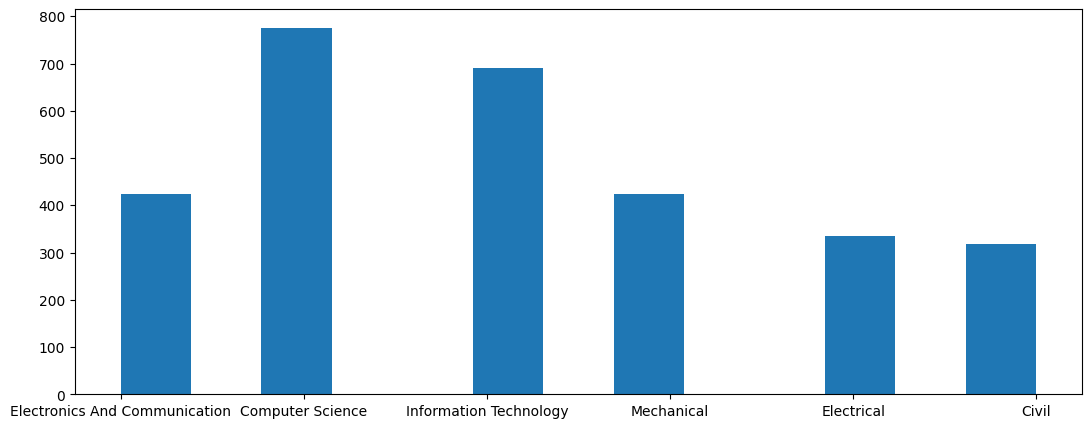

In [ ]:
fig, ax = plt.subplots(figsize=(13,5))
plt.hist(dataset['Stream'],bins=13)

plt.show()

In [ ]:
dataset['Stream'].value_counts()

,count
Stream,
Computer Science,776
Information Technology,691
Electronics And Communication,424
Mechanical,424
Electrical,334
Civil,317


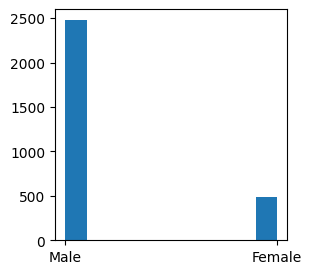

In [ ]:
fig, ax = plt.subplots(figsize=(3,3))
plt.hist(dataset['Gender'])

plt.show()

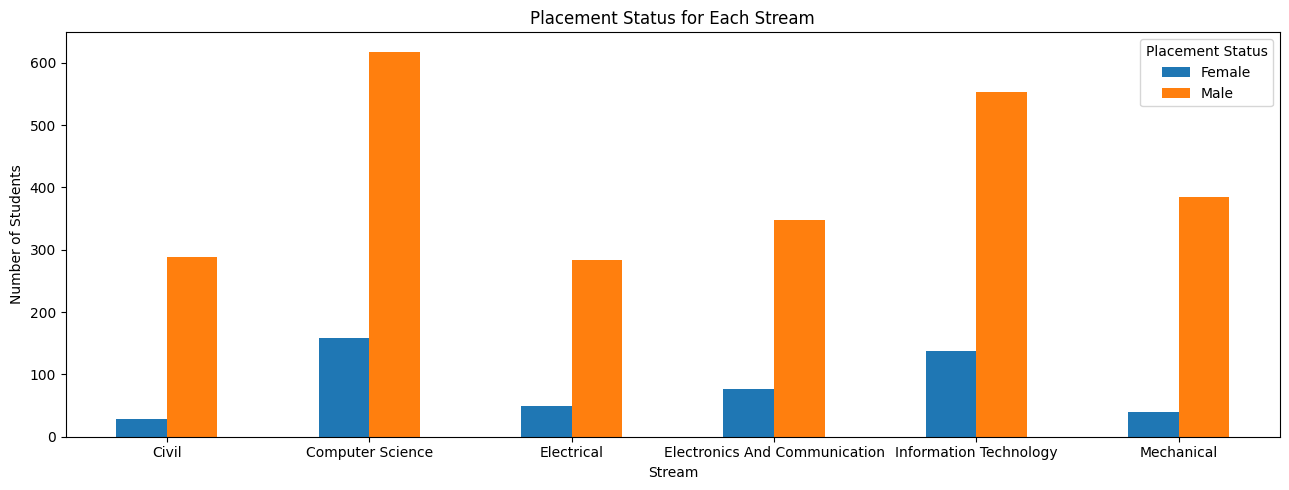

In [ ]:
placement_counts = dataset.groupby(['Stream', 'Gender']).size().unstack(fill_value=0)

# Plot the bar chart
placement_counts.plot(kind='bar',figsize=(13,5))

# Add titles and labels
plt.title('Placement Status for Each Stream')
plt.xlabel('Stream')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)

# Add a legend
plt.legend(title='Placement Status',labels=['Female','Male'])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x = dataset.drop(columns=['PlacedOrNot']).select_dtypes(include=['number'])
y = dataset['PlacedOrNot']

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


,Age,Internships,CGPA,Hostel,HistoryOfBacklogs
0,22,1,8,1,1
1,21,0,7,1,1
2,22,1,6,0,0
3,21,0,8,0,1
4,22,0,8,1,0
...,...,...,...,...,...
2961,23,0,7,0,0
2962,23,1,7,1,0
2963,22,1,7,0,0
2964,22,1,7,0,0
